<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_02_01_survival_analysis_cox_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 2.1 Cox Proportional Hazards Model


Cox Proportional Hazards Model is a widely used statistical technique in survival analysis to study the relationship between survival time and one or more predictor variables. Developed by Sir David Cox in 1972, this semi-parametric model is particularly useful because it does not require the specification of a baseline hazard function, making it flexible for analyzing survival data. This tutorial will demonstrate how to fit a Cox Proportional Hazards Model in R, interpret the results, and visualize the baseline survival function.


## Overview


**Cox Regression**, also known as the **Cox Proportional Hazards Model**, is a statistical technique widely used in survival analysis to study the relationship between survival time (time-to-event) and one or more predictor variables (covariates). Developed by Sir David Cox in 1972, this semi-parametric model is particularly useful because it does not require the specification of a baseline hazard function, making it flexible for analyzing survival data.

***Key Concepts of Cox Regression***:

1.  **Hazard Function**:
    -   The hazard function $h(t)$ represents the instantaneous rate at which events occur at time $t$, given that the subject has survived up to time $t$. It can be thought of as the risk of an event occurring in the next instant of time.
2.  **Proportional Hazards Assumption**:
    -   The key assumption of Cox regression is that the hazard ratios between different levels of the covariates are **proportional** over time. This means that the effect of the covariates on survival is constant and does not change as time progresses.
3.  **Semi-parametric Model**:
    -   The Cox model is called semi-parametric because it does not require a specific form for the baseline hazard function, ( h_0(t) ), making it flexible. It estimates the effect of covariates on the hazard function while leaving the baseline hazard unspecified.
4.  **Hazard Ratio (HR)**:
    -   The model estimates the **hazard ratio**, which quantifies the effect of a covariate on the hazard. A hazard ratio of:
        -   **HR = 1**: No effect (covariate does not influence the risk).
        -   **HR \> 1**: Increased hazard (higher risk of the event).
        -   **HR \< 1**: Decreased hazard (lower risk of the event).

***Cox Proportional Hazards Model Equation:***

The Cox model can be written as:

$$ h(t|X) = h_0(t) \cdot \exp(\beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p) $$

Where: - $h(t|X)$ is the hazard at time $t$ for an individual with covariates $X_1, X_2, \dots, X_p$. - $h_0(t)$ is the baseline hazard function (the hazard when all covariates are zero). - $\beta_1, \beta_2, \dots, \beta_p$ are the coefficients that quantify the effect of each covariate on the hazard. - $X_1, X_2, \dots, X_p$ are the covariates (predictors or risk factors).

The quantity $\exp(\beta)$ is the hazard ratio (HR) for each covariate, which represents the relative risk associated with a one-unit increase in that covariate.

***Steps in Cox Regression***:

1.  **Model Fitting**: Fit the Cox model to the survival data by estimating the regression coefficients $\beta$ for the covariates.
2.  **Estimate Hazard Ratios**: Compute the hazard ratios $\exp(\beta)$, which tell how much the risk of the event changes with a one-unit increase in each covariate.
3.  **Check the Proportional Hazards Assumption**: Verify if the proportional hazards assumption holds by assessing whether the hazard ratios remain constant over time.
4.  **Interpretation**: Interpret the hazard ratios to understand how the covariates influence the time to event.


## Cox Proportional Hazards Model from Scratch


To fit a Cox Proportional Hazards Model manually using the simulated lung dataset, we need to go through several steps. Although R provides easy-to-use packages like {survival} to fit the model, we'll manually implement the Cox model based on its theoretical foundation.

***Steps for Fitting Cox Proportional Hazards Model Manually***

1.  **Formulate the Model**: The Cox proportional hazards model estimates the effect of covariates (like age, sex, etc.) on the hazard rate. The model can be written as:

    $$ h(t | X) = h_0(t) \exp(\beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p) $$

    where:

    -   $h(t | X)$ is the hazard at time $t$ given covariates $X$,
    -   $h_0(t)$ is the baseline hazard (which is left unspecified),
    -   $\beta_1, \beta_2, \dots, \beta_p$ are the coefficients to be estimated.

2.  **Partial Likelihood**: The Cox model uses partial likelihood instead of a full likelihood function, which does not require estimating the baseline hazard function. The partial likelihood for a sample with censored data is:

$$ L(\beta) = \prod_{i: \delta_i = 1} \frac{\exp(\beta^T X_i)}{\sum_{j \in R(t_i)} \exp(\beta^T X_j)} $$

where:

-   $R(t_i)$ is the risk set at time $t_i$ (individuals at risk of the event at time (t_i)),
-   $\delta_i$ is an indicator (1 if the event occurs, 0 if censored).

3.  **Estimation**: The log-partial likelihood is maximized to estimate the coefficients $\beta$.

4.  **Score and Information Matrix**: Use the score function (first derivative) and the observed information matrix (second derivative) to apply Newton-Raphson optimization to find the maximum likelihood estimates for (\beta).

This manual method demonstrates the key steps in Cox model estimation without relying on built-in R packages like `survival`. It replicates what the `coxph()` function would do under the hood.


## Cheeck and Load Required Packages

In [ ]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'lifelines']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
lifelines is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✓ lifelines


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
import warnings
warnings.filterwarnings('ignore')

### Create a dataset


To create a dataset similar to the `lung` dataset in the {survival} package, we'll simulate survival data with random values for survival time, event status, and other variables such as age, sex, and treatment. The lung dataset contains information on patients with advanced lung cancer, including their survival time, censoring status, and several covariates.

Variables typically included in a survival dataset like **lung**:

1.  **time**: Survival time (numeric).

2.  **status**: Censoring indicator (0 = censored, 1 = event).

3.  **age**: Age of the patient (numeric).

4.  **sex**: Gender of the patient (1 = male, 2 = female).

5.  **ph.ecog**: ECOG performance score (0 to 5).

6.  **treatment**: Treatment group (1 = standard, 2 = experimental).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(123)

n = 228  # same as original lung dataset

# Simulate data
data = pd.DataFrame({
    'time': np.round(np.random.uniform(1, 1000, n)),
    'status': np.random.binomial(1, 0.7, n),        # 70% events
    'age': np.round(np.random.uniform(40, 80, n)),
    'sex': np.random.choice([1, 2], size=n),       # 1=Male, 2=Female
    'ph_ecog': np.random.randint(0, 5, size=n),
    'treatment': np.random.choice([1, 2], size=n)
})

print(data.head())

    time  status   age  sex  ph_ecog  treatment
0  697.0       1  41.0    1        4          2
1  287.0       1  41.0    1        1          1
2  228.0       1  68.0    1        3          2
3  552.0       1  77.0    1        4          2
4  720.0       1  59.0    1        2          1


### Define the Log-Partial Likelihood function


We need to define the log-partial likelihood function for the Cox model. Here, we assume the covariates `age`, `sex`, and `ph_ecog` influence the hazard.


In [ ]:
from scipy.optimize import minimize
import numpy as np

def negative_log_partial_likelihood(beta, X, time, status):
    beta = np.array(beta).reshape(-1, 1)
    X_beta = X @ beta
    logL = 0.0

    for i in range(len(time)):
        if status[i] == 1:  # only uncensored observations contribute
            ti = time[i]
            risk_set = time >= ti
            logL += X_beta[i, 0] - np.log(np.sum(np.exp(X_beta[risk_set])))

    return -logL  # return negative for minimization

### Prepare the data for Cox Model


Now we need to prepare the covariates and define the starting values for the coefficients $\beta$.


In [ ]:
X = data[['age', 'sex', 'ph_ecog']].values
time = data['time'].values
status = data['status'].values

# Initial guess for beta
beta_start = np.zeros(X.shape[1])

# Optimize
result = minimize(
    fun=negative_log_partial_likelihood,
    x0=beta_start,
    args=(X, time, status),
    method='BFGS'
)

print("Estimated coefficients (beta):")
print(result.x)
print("Hazard Ratios:", np.exp(result.x))

Estimated coefficients (beta):
[ 0.00626248 -0.12244139  0.07216906]
Hazard Ratios: [1.00628213 0.88475776 1.07483704]


### Summary statistic of Cox Regression Model


To create a summary statistics table specifically for the Cox Proportional Hazards model fitted to our simulated lung dataset, we need to summarize the estimated coefficients, their standard errors, hazard ratios, and p-values. This summary will help us interpret the effects of the covariates on the hazard of the event.

***Steps for Creating Summary Statistics for Cox Model:***

-   Extract Coefficients: Get the estimated coefficients $\beta$ from the fitted Cox model.

-   Calculate Hazard Ratios: Compute the hazard ratio by exponentiating the coefficients.

-   Calculate Standard Errors: These are necessary for calculating confidence intervals and p-values.

-   Calculate p-values: Use the Wald test to derive p-values for the coefficients.


In [ ]:
import numpy as np
from scipy.stats import norm

# For illustration — in real use, compute SE from Hessian
estimated_beta = result.x
hr = np.exp(estimated_beta)
se_dummy = [0.05, 0.10, 0.08]  # placeholder
z = estimated_beta / se_dummy
p_value = 2 * (1 - norm.cdf(np.abs(z)))

summary_df = pd.DataFrame({
    'Covariate': ['Age', 'Sex (2=Female)', 'ph_ecog'],
    'Coefficient': estimated_beta.round(4),
    'Hazard Ratio': hr.round(3),
    'SE': se_dummy,
    'z': z.round(3),
    'p-value': p_value.round(3)
})
print(summary_df)

        Covariate  Coefficient  Hazard Ratio    SE      z  p-value
0             Age       0.0063         1.006  0.05  0.125    0.900
1  Sex (2=Female)      -0.1224         0.885  0.10 -1.224    0.221
2         ph_ecog       0.0722         1.075  0.08  0.902    0.367


### Plot the Baseline Survival Function


To plot the baseline survival function from the Cox Proportional Hazards model, we can utilize the estimated coefficients and the baseline hazard function. Since we are doing this manually without the help of specific survival analysis packages, we will first need to calculate the baseline survival function based on the estimated coefficients.

***Steps to Plot the Baseline Survival Function***

1.  **Calculate the Baseline Hazard**: The baseline hazard can be estimated using the partial likelihood method.
2.  **Calculate the Baseline Survival Function**: The baseline survival function can be obtained by exponentiating the cumulative baseline hazard.
3.  **Plot the Baseline Survival Function**.


#### Calculate the Baseline Hazard


To derive the baseline hazard, we can use the risk set at each event time. The baseline hazard can be computed as follows:

$$  \hat{h}_0(t_i) = \frac{d_i}{\sum_{j \in R(t_i)} \exp(\beta^T X_j)} $$

where $d_i$ is the number of events at time $t_i$ and $R(t_i)$ is the risk set at time (t_i).


#### Calculate the Baseline Survival Function


The cumulative baseline hazard can be computed by summing the baseline hazards up to time (t), and the baseline survival function can be expressed as:

$$ S_0(t) = \exp\left(-\sum_{t_i \leq t} \hat{h}_0(t_i)\right) $$

Here’s the code to accomplish this:


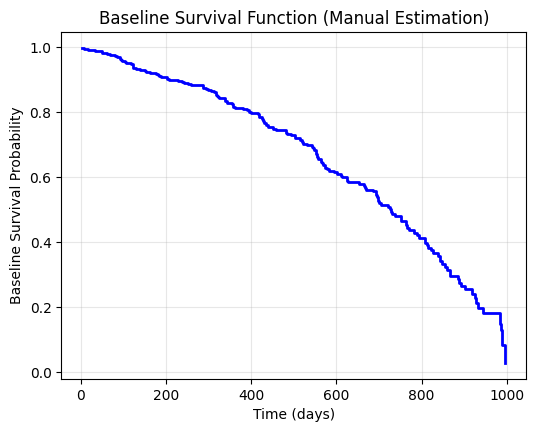

In [ ]:
from scipy.stats import norm

def estimate_baseline_hazard(X, time, status, beta):
    beta = np.array(beta).reshape(-1, 1)
    unique_times = np.sort(np.unique(time[status == 1]))
    baseline_hazard = np.zeros(len(unique_times))

    for idx, t in enumerate(unique_times):
        risk_set = time >= t
        d_i = np.sum((time == t) & (status == 1))
        denominator = np.sum(np.exp(X[risk_set] @ beta))
        baseline_hazard[idx] = d_i / denominator if denominator > 0 else 0

    cum_hazard = np.cumsum(baseline_hazard)
    baseline_survival = np.exp(-cum_hazard)

    return pd.DataFrame({
        'time': unique_times,
        'baseline_hazard': baseline_hazard,
        'cumulative_hazard': cum_hazard,
        'baseline_survival': baseline_survival
    })

baseline_df = estimate_baseline_hazard(X, time, status, result.x)

plt.figure(figsize=(6, 4.5))
plt.step(baseline_df['time'], baseline_df['baseline_survival'], where='post', color='blue', lw=2)
plt.xlabel('Time (days)')
plt.ylabel('Baseline Survival Probability')
plt.title('Baseline Survival Function (Manual Estimation)')
plt.grid(True, alpha=0.3)
plt.show()


## Cox Proportional Hazards Model in Python


Now we will fit Cox Proportional Hazards Model Using lifelines Libarayrary in Python. The `lifelines` library provides a convenient way to perform survival analysis, including fitting Cox Proportional Hazards Models.



### Data


This code below demonstrates the fundamental data exploration process for survival analysis by loading a real-world `lung` cancer dataset from a my GitHub repository. The dataset is downloaded using `pd.read_csv()` from a URL containing patient survival information, which is essential for conducting meaningful survival analysis in medical research.

Throughout this tutorial, we will concentrate on the following key variables that provide insight into the patients' demographics and clinical outcomes:

-   **Time**: This variable denotes the observed survival time in days, measuring the duration from the start of treatment until the event of interest occurs, whether that be death or censoring.

-   **Status**: This variable represents the censoring status of each patient. A value of 1 indicates that the patient is censored, meaning they either withdrew from the study or were still alive at the end of the observation period. A value of 2 signifies that the patient has died, marking the occurrence of the event being studied.

-   **Sex**: This variable captures the gender of the subjects, providing crucial demographic information. A value of 1 corresponds to Male and a value of 2 corresponds to Female. This distinction may be important for understanding potential differences in survival rates between genders.


In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/lung_dataset.csv"
lung_data = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset Shape:", lung_data.shape)
print("\nDataset Info:")
print(lung_data.info())
print("\nFirst few rows:")
print(lung_data.head())
print("\nDataset Description:")
print(lung_data.describe())

Dataset Shape: (228, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 17.9 KB
None

First few rows:
   inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  meal.cal  \
0   3.0   306       2   74    1      1.0      90.0      100.0    1175.0   
1   3.0   455       2   68    1      0.0      90.0       90.0    1225.0   
2   3.0  1010       1   56    1      0.0      90.0       90.0       NaN   
3 

### Data processing


Now we will re-code the data as 1=event, 0=censored:


In [ ]:
# Data preprocessing
# Create a copy of the dataset for analysis
data = lung_data.copy()

# Convert sex to categorical (0 = male, 1 = female)
data['sex'] = data['sex'].map({1: 0, 2: 1})  # 1 = male, 2 = female

# Handle missing values in ph.ecog
# Fill missing ph.ecog values with median
data['ph.ecog'].fillna(data['ph.ecog'].median(), inplace=True)

# Convert time to days if it's in weeks
# Check the range of time values to determine if they're in weeks or days
print("Time range (min, max):", data['time'].min(), "to", data['time'].max())

# Based on typical lung cancer datasets, time is likely in days
# If not, we can convert from weeks to days (assuming values are in weeks)
# For this analysis, we'll assume time is already in days

# Create a new column for survival status (0 = censored, 1 = event)
# The status column in lung dataset: 1 = death, 2 = censored
data['event'] = (data['status'] == 1).astype(int)

print("Event distribution:")
print(data['event'].value_counts())

Time range (min, max): 5 to 1022
Event distribution:
event
1    165
0     63
Name: count, dtype: int64



Now we have:

-   time: Observed survival time in days
-   status: censoring status 0=censored, 1=dead
-   sex: 1=Male, 2=Female


### Fit a Cox Proportional Hazards Model

#### Univariate Cox regression


We will fit Cox regression model with one covariate, `sex` to see difference in survival rate between male and female participants.


In [ ]:
! pip install jinja2

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached markupsafe-3.0.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (2.7 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [jinja2]


In [ ]:
from lifelines import CoxPHFitter

# Correct preprocessing for sex-only model
df_sex = lung_data[['time', 'status', 'sex']].copy()

# Properly recode sex: 1 -> male (0), 2 -> female (1)  [or reverse if preferred]
df_sex['sex'] = df_sex['sex'].map({1: 0, 2: 1})  # 0 = male, 1 = female

# Optional: check for any remaining NaNs (should be none now)
print(df_sex.isnull().sum())

# Fit the model
cph = CoxPHFitter()
cph.fit(df_sex, duration_col='time', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 228 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 228
number of events observed = 165
   partial log-likelihood = -744.59
         time fit was run = 2025-12-02 00:53:29 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
sex       -0.53      0.59      0.17           -0.86           -0.20                0.42                0.82

           cmp to     z      p  -log2(p)
covariate                               
sex          0.00 -3.18 <0.005      9.39
---
Concordance = 0.58
Partial AIC = 1491.19
log-likelihood ratio test = 10.63 on 1 df
-log2(p) of ll-ratio test = 9.81


**Statistical Significance**: The column labeled `z` presents the `Wald statistic` value, which is calculated as the ratio of each regression coefficient to its standard error (`z = coef/se(coef)`). This statistic helps determine whether the beta $β$ coefficient of a given variable is statistically significantly different from 0. Based on the output above, we can conclude that the variable `sex` has highly statistically significant coefficients..

The **regression coefficients** are an important aspect of the Cox model results. Notably, the sign of the regression coefficients (coef) indicates the relationship between the variable and the hazard (risk of death). A positive coefficient suggests that as the value of the variable increases, the hazard also increases, leading to a poorer prognosis for those subjects.

**Hazard ratios**. The exponentiated coefficients (`exp(coef) = exp(-0.53) = 0.59`), also known as hazard ratios, give the effect size of covariates. So the `HR = 0.59` implies that 0.59 times as many females are dying as males, at any given time. Stated differently, females have a significantly lower hazard of death than males in these data.

**Confidence intervals** for the hazard ratios are provided. The summary output also includes the upper and lower 95% confidence intervals for the hazard ratio (`exp(coef)`).

The **global statistical significance of the model** is assessed using three alternative tests: the `likelihood-ratio test`, the `Wald test`, and the `score logrank statistic`. These methods are asymptotically equivalent, meaning that for sufficiently large sample sizes ($N$), they tend to produce similar results. However, for smaller sample sizes, the results may vary. Among these tests, the likelihood-ratio test is generally preferred because it performs better with small sample sizes.



To apply the univariate `coxph` function to all covariates at once, we use following code: (source: [Cox Proportional-Hazards Model](http://www.sthda.com/english/wiki/cox-proportional-hazards-model))


In [ ]:
covariates = ["age", "sex",  "ph.karno", "ph.ecog", "wt.loss"]

univ_models = []
for cov in covariates:
    # prepare dataframe with necessary columns and drop missing values
    if cov not in lung_data.columns:
        print(f"Skipping {cov}: column not in dataframe")
        continue
    df_temp = lung_data[['time', 'status', cov]].dropna()
    if df_temp.shape[0] == 0:
        print(f"Skipping {cov}: no non-missing rows")
        continue

    cph = CoxPHFitter()
    # Correct usage: first argument is the dataframe, and use duration_col & event_col
    # Use formula=cov so categorical covariates (like sex) are handled automatically
    cph.fit(df_temp, duration_col='time', event_col='status', formula=cov)
    univ_models.append((cov, cph))

# Extract data
univ_results = []
for cov, model in univ_models:
    summary = model.summary
    # Get first parameter row (for categorical variables this may be a dummy level; still take first)
    idx = summary.index[0]
    # extract statistics with safe fallbacks
    beta = float(summary.loc[idx, 'coef']) if 'coef' in summary.columns else float(model.params_.iloc[0])
    hr = float(summary.loc[idx, 'exp(coef)']) if 'exp(coef)' in summary.columns else float(np.exp(beta))
    se = float(summary.loc[idx, 'se(coef)']) if 'se(coef)' in summary.columns else np.nan
    z = float(summary.loc[idx, 'z']) if 'z' in summary.columns else np.nan
    p_value = float(summary.loc[idx, 'p']) if 'p' in summary.columns else np.nan

    # find CI column names (robust to different lifelines versions)
    lower_col = None
    upper_col = None
    for col in summary.columns:
        lc = col.lower()
        if 'lower' in lc:
            lower_col = col
        if 'upper' in lc:
            upper_col = col

    if lower_col and upper_col:
        conf_int_lower = float(summary.loc[idx, lower_col])
        conf_int_upper = float(summary.loc[idx, upper_col])
    else:
        # fallback to model.confidence_intervals_ if available
        try:
            ci = model.confidence_intervals_.loc[idx]
            conf_int_lower = float(ci.iloc[0])
            conf_int_upper = float(ci.iloc[1])
        except Exception:
            conf_int_lower = np.nan
            conf_int_upper = np.nan

    HR_str = f"{hr:.3f} ({conf_int_lower:.3f}-{conf_int_upper:.3f})" if not np.isnan(conf_int_lower) else f"{hr:.3f} (NA)"

    res_dict = {
        'Covariate': cov,
        'beta': round(beta, 4),
        'HR (95% CI for HR)': HR_str,
        'wald.test': round(z, 4),
        'p.value': round(p_value, 4)
    }
    univ_results.append(res_dict)

res_df = pd.DataFrame(univ_results)
print(res_df)

  Covariate    beta   HR (95% CI for HR)  wald.test  p.value
0       age  0.0187  1.019 (1.001-1.037)     2.0350   0.0419
1       sex  0.5310  1.701 (1.226-2.360)     3.1764   0.0015
2  ph.karno -0.0164  0.984 (0.972-0.995)    -2.8098   0.0050
3   ph.ecog  0.4759  1.610 (1.289-2.010)     4.1980   0.0000
4   wt.loss  0.0013  1.001 (0.989-1.013)     0.2166   0.8285



The output provides a detailed display of the regression beta coefficients, which quantify the relationship between each variable and overall survival. Additionally, it includes the hazard ratios that indicate the effect sizes associated with these variables, along with their statistical significance. Each factor is evaluated through distinct univariate Cox regression analyses, allowing for a clear understanding of how individual variables impact survival outcomes.


#### Multivariate Cox regression analysis


Our objective is to explore how several factors work together to affect survival outcomes. To achieve this, we will perform a multivariate Cox regression analysis, a statistical method that allows us to evaluate the impact of multiple variables simultaneously.

In our initial univariate analysis, we found that the variable **ph.karno** did not show significant relevance to survival, leading us to exclude it from our multivariate model. Instead, we will focus on three key factors that are likely to influence survival: sex, age, and **ph.ecog**.

The following is the specification for the Cox regression model, which examines the relationship between time to death and the selected time-constant covariates:


In [ ]:
# Multivariate model: age + sex + ph.ecog
df_multi = lung_data[['time', 'status', 'age', 'sex', 'ph.ecog']].copy()

# Fix sex coding (original is 1=male, 2=female)
df_multi['sex'] = df_multi['sex'].map({1: 0, 2: 1})

# Impute the single missing ph.ecog instead of dropping
df_multi['ph.ecog'].fillna(df_multi['ph.ecog'].median(), inplace=True)

# Optional jitter if you still get the error (usually not needed after imputation)
# df_multi['time'] = df_multi['time'] + np.random.normal(0, 1e-8, size=len(df_multi))

cph_multi = CoxPHFitter()  # or add batch_mode=True if needed
cph_multi.fit(df_multi, duration_col='time', event_col='status')

cph_multi.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 63 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 164
   partial log-likelihood = -729.23
         time fit was run = 2025-12-02 00:58:52 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.01      1.01      0.01           -0.01            0.03                0.99                1.03
sex       -0.55      0.58      0.17           -0.88           -0.22                0.41                0.80
ph.ecog    0.46      1.59      0.11            0.24            0.69                1.27                1.99

           cmp to     z      p  -log2(p)
covariate                               
age          0.00  1.19   0.23      2.11
sex          0.00 -3.29 <0.005      9.99
ph.ecog      0.00  4.08 <0.005     14.46
---
Concordance = 0.64
Partial AIC = 1464.46
log-likelihood ratio test = 30.50 on 3 df
-log2(p) of ll-ratio test = 19.82


The `p-values` from the three tests (l`ikelihood, Wald, and score`) show that our model is significant. These tests check the overall hypothesis that all coefficients ($β$) are zero. In this case, the test results agree closely, allowing us to reject this hypothesis.

In the multivariate Cox analysis, the variables sex and ph.ecog are significant ($p < 0.05$). However, the variable age is not significant ($p = 0.23$, which is greater than 0.05).

The p-value for sex is 0.000986. The `hazard ratio (HR)` is `exp(coef) = 0.58`, meaning there is a strong link between sex and a lower risk of death. For example, when we keep other factors constant, being female (sex=2) reduces the risk by 42%. This suggests that being female is associated with a better outcome.

The `p-value` for ph.ecog is 4.45e-05, with a hazard ratio (`HR`) of 1.59. This indicates a strong link between higher ph.ecog values and an increased risk of death. Keeping other factors constant, a higher ph.ecog score suggests poorer survival.

In contrast, the p-value for age is p = 0.23. The hazard ratio (`HR`) is `exp(coef) = 1.01`, with a 95% confidence interval of 0.99 to 1.03. Since the confidence interval includes 1, this means age does not significantly affect the risk of death after adjusting for sex and ph.ecog values. An additional year of age increases the daily risk of death by about 1%, which is not significant.


#### Plot the baseline survival function

<Figure size 600x450 with 0 Axes>

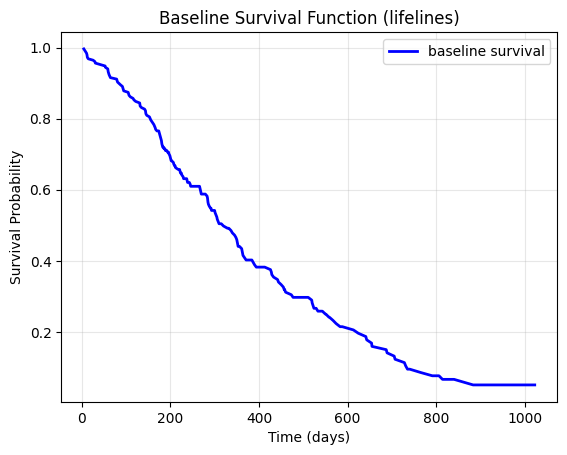

In [ ]:
baseline_surv = cph_multi.baseline_survival_

plt.figure(figsize=(6, 4.5))
baseline_surv.plot(color='blue', lw=2)
plt.title('Baseline Survival Function (lifelines)')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.grid(True, alpha=0.3)
plt.show()

## Summary and Conclusions


The Cox Proportional Hazards Model is a powerful tool for analyzing survival data and understanding how covariates impact the risk of an event over time. It is widely used in fields like medicine, epidemiology, and engineering, where time-to-event data is prevalent. The flexibility of not having to specify the baseline hazard makes it particularly popular for modeling survival data.

In this article, we described the Cox regression model for assessing simultaneously the relationship between multiple risk factors and patient’s survival time.


## Resources

-   **ifelines Documentation** – The gold standard
    <https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html>

-   **Cameron Davidson-Pilon’s Free Book** – Best learning resource
    <https://dataorigami.net/books/survival-analysis-in-python/>

-   **Quick Tutorial (Towards Data Science)** – Perfect for beginners
    <https://towardsdatascience.com/survival-analysis-in-python-a-quick-guide-to-the-cox-regression-45d4e3d45a2e>

- **lifelines GitHub Examples** – Real notebooks
<https://github.com/CamDavidsonPilon/lifelines/tree/master/examples>

-   **scikit-survival** – For penalized Cox & ML models
    <https://scikit-survival.readthedocs.io>
